In [1]:
import os
import numpy as np
import camera
import raymarch
import distance_estimator
import matplotlib
import matplotlib.pyplot as plt
from utils import rotation_matrix
from tqdm.notebook import tqdm

SCREEN_HEIGHT = 150*3
SCREEN_WIDTH = 200*3

  0%|          | 0/450 [00:00<?, ?it/s]

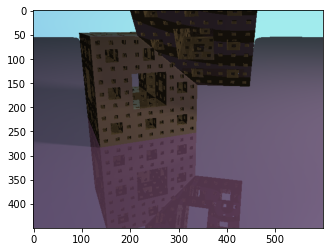

In [2]:
object_type = 'reflected_cube_with_floor'

if object_type == 'tetrahedron_with_floor':
    DistanceEstimator = distance_estimator.tetrahedron_with_floor
elif object_type == 'cube_with_floor':
    DistanceEstimator = distance_estimator.cube_with_floor
elif object_type == 'distorted_cube_with_floor':
    DistanceEstimator = distance_estimator.distorted_cube_with_floor
elif object_type == 'reflected_cube_with_floor':
    DistanceEstimator = distance_estimator.reflected_cube_with_floor
else:
    DistanceEstimator = distance_estimator.inf_ball

if not os.path.exists('output_imgs'):
    os.mkdir('output_imgs')
    
for t in range(1):
    rotation = rotation_matrix(0,0,0.40*(t-1)) @ rotation_matrix(0,-0.32,0)
    translation = rotation_matrix(0,0,0.40*(t-1)) @ np.array([10,0,10*np.tan(0.32)]) + np.array([0,1.5,0])
    cameraCor, direction = camera.getPixelData(SCREEN_WIDTH, SCREEN_HEIGHT, rotation, translation)
    image = np.zeros((SCREEN_HEIGHT, SCREEN_WIDTH, 3))

    for i in tqdm(range(SCREEN_HEIGHT)):
        for j in range(SCREEN_WIDTH):
            image[i][j] = raymarch.rayMarching(cameraCor, direction[i][j], DistanceEstimator, 10) * 255.0
    image /= 255.0
    plt.imshow(image)
    plt.show()
    matplotlib.image.imsave(os.path.join('output_imgs', str(t) + '.png'), image)